## 4.10 Coding Etiquette & Excel Reporting


## Table of Contents

1. [Importing data](#imp)
2. [Tasks](#tasks)
   1. [Task 2](#task2)
   2. [Task 3a](#task3a)
   3. [Task 3b](#task3b)
   4. [Task 4](#task4)
   5. [Task 5](#task5)
   6. [Task 6](#task6)
   7. [Task 7](#task7)
   8. [Task 8](#task8)
   9. [Task 9](#task9)


In [2]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


### 1. Importing data <a class="anchor" id="imp"></a>


In [3]:
# Load final data set

# set path
path = r'/Users/ivarvoorman/CareerFoundry/Data Analytics/Data Immersion/4 Python Fundamentals for Data Analysts/01-2022 Instacart Basket Analysis'

# Load orders_products_merged_enriched.pkl to dataframe ords_prods_merge
df_ords_prods_all = pd.read_pickle(os.path.join(
    path, '02 Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))


### 2. Tasks <a class="anchor" id="tasks"></a>


##### 1. Task 2 <a class="anchor" id="task2"></a>


Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

According to PII the first_name and last_name must be removed from the data for this data analysis


In [4]:
# Create a new version of df_ords_prods_cust_merged without the "first_name" and "last_name" columns called df_ords_prods_cust_merged_2
df_ords_prods_all_pii = df_ords_prods_all.drop(
    columns=['first_name', 'last_name'])


##### 2. Task 3a <a class="anchor" id="task3a"></a>


Task 3a  
Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.Task3Tdsfs


In [ ]:
# Get frequency for column state
df_ords_prods_all_pii['state'].value_counts(dropna=True)


In [6]:
# Create list "Region_1" with states from the Northeast region
Region_1 = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut',
            'New York', 'Pennsylvania', 'New Jersey']


In [7]:
# Create list "Region_2" with states from the Midwest region
Region_2 = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota',
            'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']


In [8]:
# Create list "Region_3" with states from the South region
Region_3 = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina',
            'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma',
            'Texas', 'Arkansas', 'Louisiana']


In [9]:
# Create list "Region_4" with states from the West region
Region_4 = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington',
            'Oregon', 'California', 'Hawaii']


In [10]:
# Create list "Region" based on state value in ords_prods_all
Region = []

for value in df_ords_prods_all_pii["state"]:
    if value in Region_1:
        Region.append("Northeast")
    elif value in Region_2:
        Region.append("Midwest")
    elif value in Region_3:
        Region.append("South")
    elif value in Region_4:
        Region.append("West")
    else:
        Region.append("NoRegionFound")


In [11]:
# Combining Region list with ords_prods_all
df_ords_prods_all_pii['region'] = Region


In [12]:
# Check the values for column region
df_ords_prods_all_pii['region'].value_counts(dropna=False)


South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

##### 3. Task 3b <a class="anchor" id="task3b"></a>


Task 3b:  
Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)


In [13]:
# Create crosstab
crosstab = pd.crosstab(
    df_ords_prods_all_pii['region'], df_ords_prods_all_pii['spending_flag'], dropna=False)


In [14]:
# Check results of crosstab
crosstab


spending_flag,High spender,Low spender
region,,
Midwest,29265,7568060
Northeast,18642,5704094
South,40579,10751306
West,31242,8261671


##### 4. Task 4 <a class="anchor" id="task4"></a>


Task 4:  
The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.


In [15]:
# If the maximum orders the user has made is less than 5, then the customer will be flagged for low_activity
df_ords_prods_all_pii.loc[df_ords_prods_all_pii['max_order']
                          < 5, 'exclusion_flag'] = 'true'


In [16]:
# print the frequency of “exclusion_flag”
df_ords_prods_all_pii['exclusion_flag'].value_counts(dropna=False)


NaN     30964564
true     1440295
Name: exclusion_flag, dtype: int64

In [17]:
# Subset the non low_activity customers into a new dataframe for the Instacard CFO
df_final = df_ords_prods_all_pii[df_ords_prods_all_pii['exclusion_flag'] != 'true']


In [18]:
# Subset the low_activity customers into a new dataframe
df_low_activity = df_ords_prods_all_pii[df_ords_prods_all_pii['exclusion_flag'] == 'true']


In [19]:
# Count the new dataframe
df_final.shape


(30964564, 33)

In [20]:
# Export the final dataframe
df_final.to_pickle(os.path.join(
    path, '02 Data', 'Prepared Data', 'df_final.pkl'))


In [21]:
# Export the low_activity customers df_low_activitydataframe
df_low_activity.to_pickle(os.path.join(
    path, '02 Data', 'Prepared Data', 'df_low_activity.pkl'))


##### 5. Task 5 <a class="anchor" id="task5"></a>


Task 5:  
The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database.

Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)


**Profile: Single adult**

- Not married: fam_status not married
- No childeren: n_dependants = 0
- 18 years and older: age > 18
- Dont like to cook: department = canned goods --> (department_id = 14)
- Dont like to cook: department = snacks --> (department_id = 18)
- Orders in the weekend: orders_day_of_week = saterday and sunday (0 and 6)

**Profile: Young parent**

- Married: fam_status = married
- Has childeren: n_dependants > 0
- 30 year max: age < 30
- Order baby items: department = babies --> (department_id = 17)
- Order houshold items: department = household --> (department_id = 16)
- Orders early morning: order_hour_of_day between 6:00 and 10:00

**Profile: Old parent**

- fMarried: fam_status = married
- Have childeren: n_dependants > 0
- Older than 30: age > 30
- Drink: department = alcohol --> (department_id = 5)
- Order international items: department = international --> (department_id = 6)
- Orders in late evening: order_hour_of_day between 19:00 and 22:00


In [ ]:
# Set the "Single adult" profile
df_final.loc[(df_final['fam_status'] != 'married') & (
    df_final['n_dependants'] == 0) & (
    df_final['age'] > 18) & (
    df_final['department_id'].isin([14, 18])) & (
    df_final['orders_day_of_week'].isin([0, 6])), 'marketing_profile'] = 'Single adult'


In [23]:
# Set the "Young partent" profile
df_final.loc[(df_final['fam_status'] == 'married') & (
    df_final['n_dependants'] >= 1) & (
    df_final['age'] < 30) & (
    df_final['department_id'].isin([16, 17])) & (
    df_final['order_hour_of_day'].isin([6, 7, 8, 9, 10])), 'marketing_profile'] = 'Young parent'


In [24]:
# Set the "Old parent" profile
df_final.loc[(df_final['fam_status'] == 'married') & (
    df_final['n_dependants'] >= 1) & (
    df_final['age'] > 30) & (
    df_final['department_id'].isin([5, 6])) & (
    df_final['order_hour_of_day'].isin([19, 20, 21, 22])), 'marketing_profile'] = 'Old parent'


In [25]:
df_final['marketing_profile'].value_counts(dropna=False)


NaN             30712331
Young parent      145340
Single adult       83043
Old parent         23850
Name: marketing_profile, dtype: int64

In [ ]:
# Transform all values in marketing_profile column to be the same value for each user_id (user_id cannot have 2 profiles)

df_final['marketing_profile'] = df_final.groupby(
    'user_id')['marketing_profile'].transform('first')


In [27]:
df_final['marketing_profile'].value_counts(dropna=False)


NaN             20052001
Single adult     4572767
Old parent       3807095
Young parent     2532701
Name: marketing_profile, dtype: int64

In [ ]:
# Impute all empty cells with 'Other'

df_final['marketing_profile'].fillna('Other', inplace=True)


In [29]:
# Check unique value counts at the customer level (how many unique customers fit into each profile?)

unique_profiles = df_final.groupby('marketing_profile')[
    'user_id'].nunique().sort_values(ascending=False)


In [30]:
unique_profiles


marketing_profile
Other           124000
Single adult     16174
Old parent       11494
Young parent     10963
Name: user_id, dtype: int64

##### 6. Task 6 <a class="anchor" id="task6"></a>


Task 6:  
Create an appropriate visualization to show the distribution of profiles.


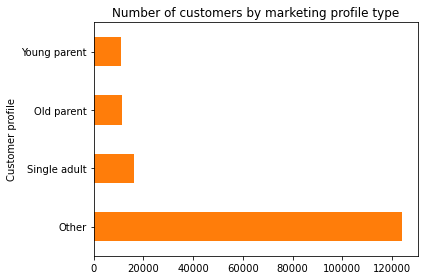

In [31]:
# Create bar chart of profiles

profile_bar = unique_profiles.plot.barh(color=['#FF7D0A'], xlabel='Customer profile',
                                        ylabel='No. of customers', title='Number of customers by marketing profile type')
plt.tight_layout()


In [32]:
# Export chart
profile_bar.figure.savefig(os.path.join(
    path, '04 Analysis', 'Visualizations', 'bar_marketing_profiles_dist.png'))


##### 7. Task 7 <a class="anchor" id="task7"></a>


Task 7:  
Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.


In [33]:
# Descriptive stats marketing_profile of usage frequency

usage_freq_stats = df_final.groupby('marketing_profile').agg(
    {'days_since_prior_order': ['mean', 'min', 'max']})


In [34]:
# result

usage_freq_stats


days_since_prior_order           
                                    mean  min   max
marketing_profile                                  
Old parent                      9.182859  0.0  30.0
Other                          11.386447  0.0  30.0
Single adult                    9.992490  0.0  30.0
Young parent                   10.257626  0.0  30.0

In [35]:
# Descriptive stats marketing_profile of the expenditure

prices_stats = df_final.groupby('marketing_profile').agg(
    {'prices': ['mean', 'min', 'max']})


In [36]:
# result

prices_stats


prices           
                       mean  min   max
marketing_profile                     
Old parent         7.844741  1.0  25.0
Other              7.774584  1.0  25.0
Single adult       7.821723  1.0  25.0
Young parent       7.779707  1.0  25.0

##### 8. Task 8 <a class="anchor" id="task8"></a>


Task: 8  
Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.


In [37]:
# crosstab of marketing_profile & region variables

crosstab_profile_region = pd.crosstab(
    df_final['marketing_profile'], df_final['region'], dropna=False)


In [38]:
# Result

crosstab_profile_region


region,Midwest,Northeast,South,West
marketing_profile,,,,
Old parent,882751,678011,1267535,978798
Other,4710165,3548951,6683495,5109390
Single adult,1074084,797256,1521858,1179569
Young parent,594513,440467,838251,659470


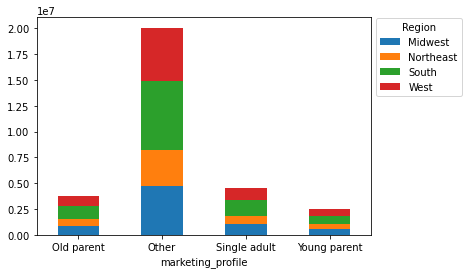

In [39]:
plot_crosstab_profile_region = crosstab_profile_region.plot(
    kind='bar', stacked=True, rot=0)
plot_crosstab_profile_region.legend(
    title='Region', bbox_to_anchor=(1, 1.02), loc='upper left');


In [40]:
# Export chart
plot_crosstab_profile_region.figure.savefig(os.path.join(
    path, '04 Analysis', 'Visualizations', 'plot_crosstab_profile_region.png'))


##### 9. Task 9 <a class="anchor" id="task9"></a>


Task 9:
Produce suitable charts to illustrate your results and export them in your project folder.


In [41]:
# Crosstab of marketing_profile & spending_flag
crosstab_profile_spending_flag = pd.crosstab(
    df_final['marketing_profile'], df_final['spending_flag'], dropna=False)


In [42]:
#
crosstab_profile_spending_flag


spending_flag,High spender,Low spender
marketing_profile,,
Old parent,4861,3802234
Other,81987,19970014
Single adult,6379,4566388
Young parent,4216,2528485


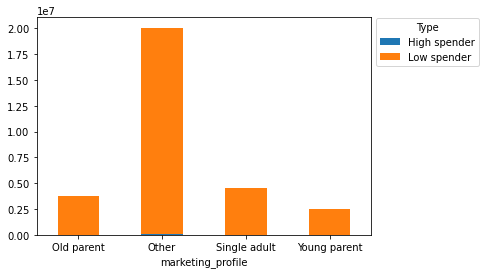

In [43]:
plot_crosstab_profile_spending_flag = crosstab_profile_spending_flag.plot(
    kind='bar', stacked=True, rot=0)
plot_crosstab_profile_spending_flag.legend(
    title='Type', bbox_to_anchor=(1, 1.02), loc='upper left');


In [44]:
# Export chart
plot_crosstab_profile_spending_flag.figure.savefig(os.path.join(
    path, '04 Analysis', 'Visualizations', 'plot_crosstab_profile_spending_flag.png'))


In [45]:
# Crosstab of marketing_profile & order_frequency_flag

crosstab_profile_order_frequency_flag = pd.crosstab(
    df_final['marketing_profile'], df_final['order_frequency_flag'], dropna=False)


In [46]:
crosstab_profile_order_frequency_flag


order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
marketing_profile,,,
Old parent,3037453,165240,604402
Other,12915108,2275239,4861654
Single adult,3407650,277792,887325
Young parent,1844265,176704,511732


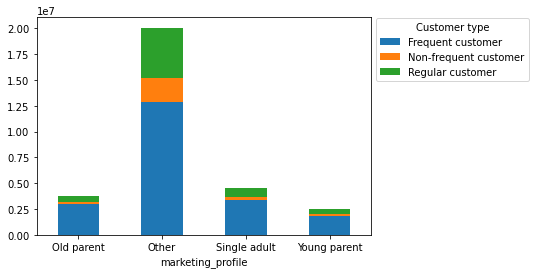

In [47]:
plot_crosstab_profile_order_frequency_flag = crosstab_profile_order_frequency_flag.plot(
    kind='bar', stacked=True, rot=0)
plot_crosstab_profile_order_frequency_flag.legend(
    title='Customer type', bbox_to_anchor=(1, 1.02), loc='upper left');


In [48]:
# Export chart
plot_crosstab_profile_order_frequency_flag.figure.savefig(os.path.join(
    path, '04 Analysis', 'Visualizations', 'plot_crosstab_profile_order_frequency_flag.png'))


In [49]:
# Check unique value counts at the customer level 

unique_price_range = df_final.groupby('price_range_loc')[
    'order_id'].nunique().sort_values(ascending=False)

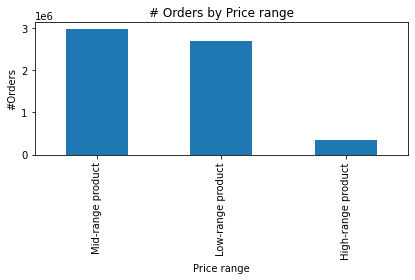

In [50]:
# Create bar chart of orders by price_range

price_range_bar = unique_price_range.plot.bar(xlabel='Price range',
                                        ylabel='#Orders', title='# Orders by Price range')
plt.tight_layout()

In [51]:
# Export chart
price_range_bar.figure.savefig(os.path.join(
    path, '04 Analysis', 'Visualizations', 'price_range_bar.png'))

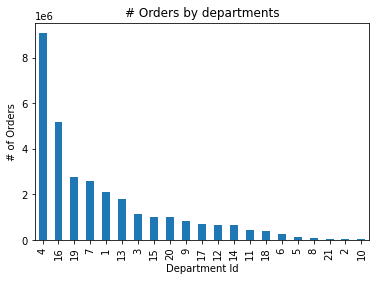

In [52]:
# Bar chart for orders by department id
df_final['department_id'].value_counts().plot.bar(xlabel='Department Id',
                                        ylabel='# of Orders', title='# Orders by departments');

In [53]:
# crosstab of loyalty_flag & price_range variables

crosstab_loyalty_price_range= pd.crosstab(
    df_final['loyalty_flag'], df_final['price_range_loc'], dropna=False)


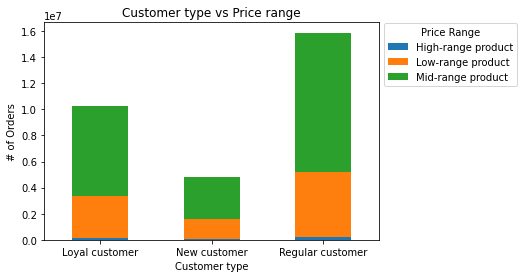

In [54]:
plot_crosstab_loyalty_price_range= crosstab_loyalty_price_range.plot(
    kind='bar', stacked=True, rot=0, title = 'Customer type vs Price range' ,ylabel = '# of Orders', xlabel = 'Customer type')
plot_crosstab_loyalty_price_range.legend(
    title='Price Range', bbox_to_anchor=(1, 1.02), loc='upper left');

In [55]:
# Export chart
plot_crosstab_loyalty_price_range.figure.savefig(os.path.join(
    path, '04 Analysis', 'Visualizations', 'plot_crosstab_loyalty_price_range.png'))


In [56]:
# crosstab of loyalty_flag & region variables

crosstab_loyalty_flag_region = pd.crosstab(
    df_final['loyalty_flag'], df_final['region'], dropna=False)

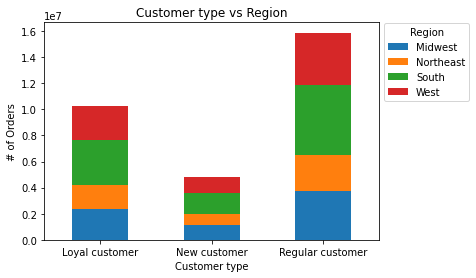

In [57]:
plot_crosstab_loyalty_flag_region = crosstab_loyalty_flag_region.plot(
    kind='bar', stacked=True, rot=0, title = 'Customer type vs Region', ylabel = '# of Orders', xlabel = 'Customer type')
plot_crosstab_loyalty_flag_region.legend(
    title='Region', bbox_to_anchor=(1, 1.02), loc='upper left');

In [58]:
# Export chart
plot_crosstab_loyalty_flag_region.figure.savefig(os.path.join(
    path, '04 Analysis', 'Visualizations', 'plot_crosstab_loyalty_flag_region.png'))


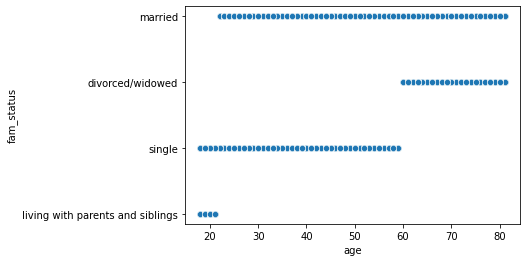

In [59]:
# Use scatterplot to investigate the “age” column against "fam_status" column 

scatter_age_fam_status = sns.scatterplot(x = 'age', y = 'fam_status',data = df_final);

In [60]:
# Export chart
scatter_age_fam_status.figure.savefig(os.path.join(
    path, '04 Analysis', 'Visualizations', 'scatter_age_fam_status.png'))

In [66]:
crosstab_loyalty_flag_age = pd.crosstab(
    df_final['loyalty_flag'], df_final['age'], dropna=False)

In [73]:
# Create list "age_category" based on age value in df_final[
age_category = []

for value in df_final["age"]:
    if value < 20:
        age_category.append("0 - 19")
    elif 20 <= value < 40 :
        age_category.append("20 - 39")
    elif 40 <= value < 60 :
        age_category.append("40 - 59")
    elif 60 <= value < 80 :
        age_category.append("60 - 80")
    else:
        age_category.append("80+")

In [ ]:
# Combining age_categoryn list with df_final
df_final['age_category'] = age_category 

In [75]:
# Check the values for column region
df_final['age_category'].value_counts(dropna=False)

40 - 59    9724950
20 - 39    9690576
60 - 80    9595907
80+         978597
0 - 19      974534
Name: age_category, dtype: int64

In [80]:
# crosstab of loyalty_flag & age range variables

crosstab_loyalty_age_range= pd.crosstab(
    df_final['loyalty_flag'], df_final['age_category'], dropna=False)

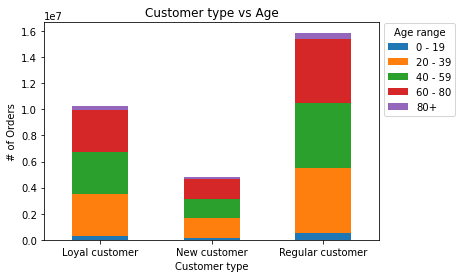

In [94]:
plot_crosstab_loyalty_age_range = crosstab_loyalty_age_range.plot(
    kind='bar', stacked=True, rot=0, title = 'Customer type vs Age', ylabel = '# of Orders', xlabel = 'Customer type')
plot_crosstab_loyalty_age_range.legend(
    title='Age range', bbox_to_anchor=(1, 1.02), loc='upper left');

In [95]:
# Export chart
plot_crosstab_loyalty_age_range.figure.savefig(os.path.join(
    path, '04 Analysis', 'Visualizations', 'plot_crosstab_loyalty_age_range.png'))

In [85]:
# crosstab of Price range & fam_status

crosstab_price_range_fam_satus= pd.crosstab(
    df_final['price_range_loc'], df_final['fam_status'], dropna=False)

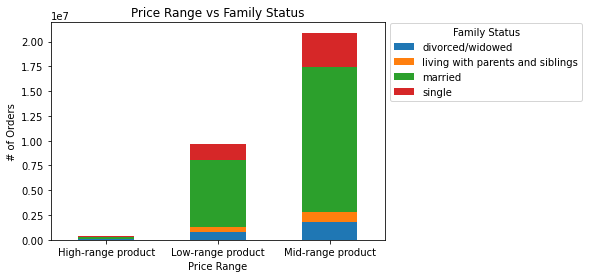

In [88]:
plot_crosstab_price_range_fam_satus = crosstab_price_range_fam_satus.plot(
    kind='bar', stacked=True, rot=0, title = 'Price Range vs Family Status', ylabel = '# of Orders', xlabel = 'Price Range')
plot_crosstab_price_range_fam_satus.legend(
    title='Family Status', bbox_to_anchor=(1, 1.02), loc='upper left');

In [89]:
# Export chart
plot_crosstab_price_range_fam_satus.figure.savefig(os.path.join(
    path, '04 Analysis', 'Visualizations', 'plot_crosstab_price_range_fam_satus.png'))

In [90]:
# crosstab of Price range & age range

crosstab_price_range_age_category = pd.crosstab(
    df_final['price_range_loc'], df_final['age_category'], dropna=False)

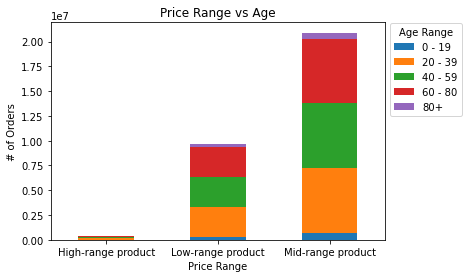

In [92]:
plot_crosstab_price_range_age_category = crosstab_price_range_age_category.plot(
    kind='bar', stacked=True, rot=0, title = 'Price Range vs Age', ylabel = '# of Orders', xlabel = 'Price Range')
plot_crosstab_price_range_age_category.legend(
    title='Age Range', bbox_to_anchor=(1, 1.02), loc='upper left');

In [93]:
# Export chart
plot_crosstab_price_range_age_category.figure.savefig(os.path.join(
    path, '04 Analysis', 'Visualizations', 'plot_crosstab_price_range_age_category.png'))

In [ ]:
# Export the final dataframe with marketing profile 
df_final.to_pickle(os.path.join(
    path, '02 Data', 'Prepared Data', 'df_final_with_profile.pkl'))